<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

En esta tarea aplicaremos el procedimiento de predicción de precios de casas desarrollado en el libro [The Elements of Statistical Learning](https://link.springer.com/book/10.1007/ en la `sección 10.14.1 California Housing`.

Usaremos el modelo de aumento de gradiente **(Gradient Boosting)** para producir un modelo predictivo a partir de un conjunto de modelos predictivos débiles **(weak)**, usando la función **ensemble.GradientBoostingRegressor** de la librería **sklearn**. El **Gradient Boosting** se puede utilizar para problemas de regresión y clasificación. En esta tarea, entrenaremos un modelo de regresión para predecir demanda eléctrica usando datos de demanda de días semejantes. La variable independiente $X$ serán los datos de demanda del día anterior, y los datos independiente $Y$ serán los datos de días con una mayor correlación con $X$.

Los datos usados en esta sección están disponibles en [demanda.csv](https://drive.google.com/file/d/1KpY2p4bfVEwGRh5tJjMx9QpH6SEwrUwH/view?usp=sharing)


In [161]:
df    = pd.read_csv('demanda.csv')

## Procesamos datos de entrenamiento 
df1 = df.loc[df.iloc[:,20].isin(['T'])] ## 'T' = training set
df2 = df1['Y']  
df1 = df1[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18']] ## Regresores

## Procesamos datos de prueba 
dft = df.loc[df.iloc[:,20].isin(['F'])] ## 'F' = test set
dft2 = dft['Y']
dft1 = dft[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18']] ## Regresores

X_train = df1.to_numpy()   ## Predictors
y_train = df2.to_numpy()   ## Outcome

X_test = dft1.to_numpy()   ## Predictors
y_test = dft2.to_numpy()   ## Outcome

Obtendremos los resultados con una función de pérdida por diferencia absoluta. Como parámetros del modelo usaremos 500 árboles de regresión `n_estimators=500`, con un número profundidad `max_depth=6` y una tasa de aprendizaje de `learning_rate": 0.01`.

In [162]:
params = { "n_estimators": 500,
           "max_depth": 6,
           "min_samples_split": 5,
           "learning_rate": 0.1,
           "loss": "absolute_error",} #"squared_error", "absolute_error", "huber", "quantile"

Ahora, ajustaremos un modelo **Gradient Boosting** con nuestros datos de entrenamiento. y calculamos el error cuadrático medio (MAE) en los datos de prueba.

In [163]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mae = mean_absolute_error(y_test, reg.predict(X_test))
print("El error medio absoluto (MAE) en datos de prueba es: {:.4f}".format(mae))

El error medio absoluto (MAE) en datos de prueba es: 213.2078


Ahora visualizaremos el proceso de ajuste con los datos de entrenamiento y prueba. Calcularemos el error del conjunto de datos de entrenamiento y luego la compararemos con las iteraciones del conjunto de datos de prueba.

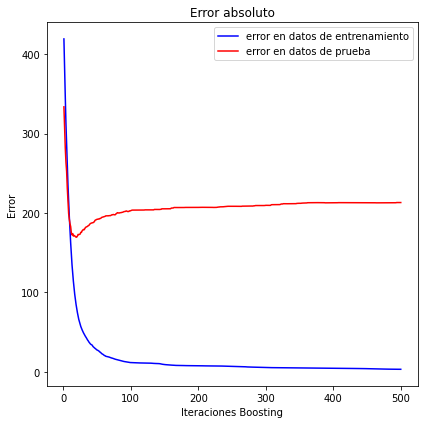

In [164]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Error absoluto")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="error en datos de entrenamiento",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="error en datos de prueba"
)
plt.legend(loc="upper right")
plt.xlabel("Iteraciones Boosting")
plt.ylabel("Error")
fig.tight_layout()
plt.show()

La importancia relativa de los predictores 

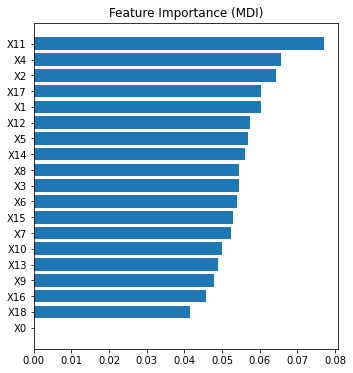

In [165]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18'])[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.show()

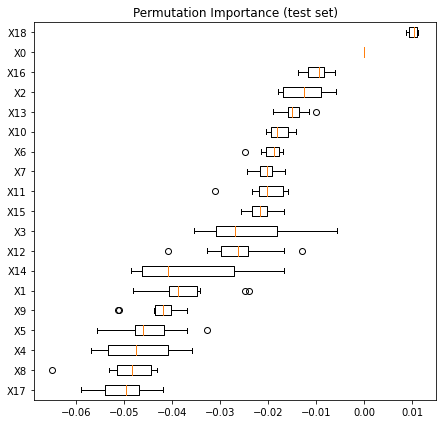

In [166]:
result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

fig = plt.figure(figsize=(12, 6))
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
   result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18'])[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

[Gradient Boosting regression](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html)

[sklearn.ensemble.GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
